## Construct regression model

In [5]:
%%bash
cat > ./regression_normal/regression.stan << EOF
data {
    int<lower=1> N; // number of data points
    real X[N];              
    real Y[N];
    real psi;       // shrinkage parameter
}
parameters {
    real B;                  // regression coefficient
    real alpha;              // intercept
    real<lower=0.001> sigma; // sd of Y|X
    real<lower=0.001> s;     // used in prior on B
}
model {
    alpha ~ normal(0,10);
    B ~ normal(0,s);
    s ~ exponential(psi);
    sigma^2 ~ inv_gamma(1,30);
    target += log(2) + log(sigma); // log of Jacobian
    for(i in 1:N) Y[i] ~ normal(X[i]*B+alpha,sigma);
}

EOF

In [6]:
cat ./regression_normal/regression.stan

data {
    int<lower=1> N; // number of data points
    real X[N];              
    real Y[N];
    real psi;       // shrinkage parameter
}
parameters {
    real B;                  // regression coefficient
    real alpha;              // intercept
    real<lower=0.001> sigma; // sd of Y|X
    real<lower=0.001> s;     // used in prior on B
}
model {
    alpha ~ normal(0,10);
    B ~ normal(0,s);
    s ~ exponential(psi);
    sigma^2 ~ inv_gamma(1,30);
    target += log(2) + log(sigma); // log of Jacobian
    for(i in 1:N) Y[i] ~ normal(X[i]*B+alpha,sigma);
}



## Compile model

In [7]:
%%bash
#module load gcc
#module load tbb
#FD_WRK=/data/reddylab/Kuei
FD_WRK=/work/kk319
FD_CUR=$(pwd)
STAN_PATH=${FD_WRK}/exe/cmdstan

make -C ${STAN_PATH} ${FD_CUR}/regression_normal/regression

make: Entering directory '/work/kk319/exe/cmdstan'

--- Translating Stan model to C++ code ---
bin/stanc  --o=/hpc/home/kk319/GitRepo/Test_on_HARDAC/learn_stan/regression_normal/regression.hpp /hpc/home/kk319/GitRepo/Test_on_HARDAC/learn_stan/regression_normal/regression.stan

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include   -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_5.7.0/include    -DBOOST_DISABLE_ASSERTS         -c -Wno-ignored-attributes   -x c++ -o /hpc/home/kk319/GitRepo/Test_on_HARDAC/learn_stan/regression_normal/regression.o /hpc/home/kk319/GitRepo/Test_on_HARDAC/learn_stan/regression_normal/regression.hpp
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_

## Test model

In [11]:
%%bash
cat ./regression_normal/input_test.json

{"N":10,"X":[0.287577520124614,0.788305135443807,0.4089769218117,0.883017404004931,0.940467284293845,0.0455564993899316,0.528105488047004,0.892419044394046,0.551435014465824,0.456614735303447],"Y":[27.4382273889574,15.3974671953358,-2.24163542425364,4.01448888506967,6.48384758329426,22.2863744737845,14.1262437586206,14.9001335503346,11.658262173917,4.8982033877627]}


In [13]:
%%bash
./regression_normal/regression sample \
    data   file=./regression_normal/input_test.json \
    output file=./regression_normal/output_test.csv

method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = hmc (Default)
      hmc
        engine = nuts (Default)
          nuts
            max_depth = 10 (Default)
        metric = diag_e (Default)
        metric_file =  (Default)
        stepsize = 1 (Default)
        stepsize_jitter = 0 (Default)
id = 0 (Default)
data
  file = ./regression_normal/input_test.json
init = 2 (Default)
random
  seed = 4204540739 (Default)
output
  file = ./regression_normal/output_test.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)


Gradient evalu

In [14]:
%%bash
#module load gcc
#module load tbb
#FD_WRK=/data/reddylab/Kuei
FD_WRK=/work/kk319
FD_CUR=$(pwd)
STAN_PATH=${FD_WRK}/exe/cmdstan

${STAN_PATH}/bin/stansummary ./regression_normal/output_test.csv

Inference for Stan model: regression_model
1 chains: each with iter=(1000); warmup=(0); thin=(1); 1000 iterations saved.

Warmup took 0.044 seconds
Sampling took 0.030 seconds

                 Mean     MCSE   StdDev       5%      50%   95%    N_Eff  N_Eff/s    R_hat

lp__              -34     0.15      1.6      -37 -3.3e+01   -32      110     3650      1.0
accept_stat__    0.76  4.0e-02  3.2e-01  3.3e-06     0.92   1.0  6.6e+01  2.2e+03  1.0e+00
stepsize__       0.40      nan  1.3e-15  4.0e-01     0.40  0.40      nan      nan      nan
treedepth__       2.6  7.1e-02  7.0e-01  1.0e+00      3.0   3.0  9.7e+01  3.2e+03  1.0e+00
n_leapfrog__      7.1  2.7e-01  3.6e+00  2.0e+00      7.0    15  1.8e+02  6.0e+03  1.0e+00
divergent__     0.090  1.8e-02  2.9e-01  0.0e+00     0.00   1.0  2.5e+02  8.2e+03  1.0e+00
energy__           36  1.7e-01  2.1e+00  3.3e+01       35    39  1.4e+02  4.8e+03  1.0e+00

B               -0.22     0.11      1.5     -2.5  3.6e-03   1.4      164     5475     1.00
al

## Run model with different betas

In [67]:
%%bash
ls ./regression_normal/input_b*.json

./regression_normal/input_b1.json
./regression_normal/input_b2.json
./regression_normal/input_b3.json
./regression_normal/input_b4.json
./regression_normal/input_b5.json


In [39]:
%%bash
### set environment on HARDAC
#module load gcc
#module load tbb

### set environment on DCC
FD_LOG=./regression_normal/log
mkdir -p ${FD_LOG} 

### run script using sbatch
#sbatch -pnew,all \
sbatch -p scavenger \
    --array=1-5 \
    --mem 8G \
    -o ${FD_LOG}/regression_beta.%a.txt \
    <<'EOF'
#!/bin/bash
FD_WRK=./regression_normal
${FD_WRK}/regression sample \
    thin=1 num_samples=1000 num_warmup=100 \
    data   file=${FD_WRK}/input_b${SLURM_ARRAY_TASK_ID}.json \
    output file=${FD_WRK}/output_b${SLURM_ARRAY_TASK_ID}.csv
EOF

Submitted batch job 11115732


In [40]:
%%bash
FD_LOG=./regression_normal/log
cat ${FD_LOG}/regression_beta.1.txt

method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 100
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
      term_buffer = 50 (Default)
      window = 25 (Default)
    algorithm = hmc (Default)
      hmc
        engine = nuts (Default)
          nuts
            max_depth = 10 (Default)
        metric = diag_e (Default)
        metric_file =  (Default)
        stepsize = 1 (Default)
        stepsize_jitter = 0 (Default)
id = 0 (Default)
data
  file = ./regression_normal/input_b1.json
init = 2 (Default)
random
  seed = 4207671881 (Default)
output
  file = ./regression_normal/output_b1.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = -1 (Default)
  profile_file = profile.csv (Default)


Gradient evaluation took 1.6e

## Visualize and compare the results

**Set environment**

In [31]:
import numpy as np
import arviz as az
import os, json
import matplotlib.pyplot as plt
import seaborn as sns

**Import data**

In [41]:
fdiry = "./regression_normal"

lst_inputs  = []
lst_outputs = []
for i in range(1,6):
    ### get output
    fname = "input_b" + str(i) + ".json"
    with open(os.path.join(fdiry, fname), "r") as file:
        tmp = json.load(file)
        lst_inputs.append(tmp)
    
    ### get input
    fname = "output_b" + str(i) + ".csv"
    with open(os.path.join(fdiry, fname), "r") as file:
        tmp = az.from_cmdstan(posterior=os.path.join(fdiry, fname))
        lst_outputs.append(tmp)

In [42]:
dat_input = lst_inputs[0]
dat_input

{'N': 10,
 'X': [0.113703411305323,
  0.622299404814839,
  0.609274732880294,
  0.623379441676661,
  0.860915383556858,
  0.640310605289415,
  0.0094957563560456,
  0.232550506014377,
  0.666083758231252,
  0.514251141343266],
 'Y': [10.5061695955689,
  9.42588233927017,
  9.45397741894869,
  9.43617138034839,
  9.11082308633945,
  9.52344761085174,
  9.00162305089665,
  9.22397865586802,
  10.0651249010345,
  10.9600083101121],
 'psi': 1,
 'B': 0.001}

In [43]:
dat_out = lst_outputs[0]
dat_out

Inference data with groups:
	> posterior
	> sample_stats

In [44]:
for dat_inp, dat_out in zip(lst_inputs, lst_outputs):
    res = az.stats.summary(dat_out, var_names="B")
    print("True beta:  ", dat_inp["B"])
    print("Est (Bayes):", res.loc['B', "mean"])
    print("")

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


True beta:   0.001
Est (Bayes): 0.142

True beta:   0.01
Est (Bayes): 0.03

True beta:   0.1
Est (Bayes): 0.292

True beta:   1
Est (Bayes): 0.039

True beta:   10
Est (Bayes): 2.704



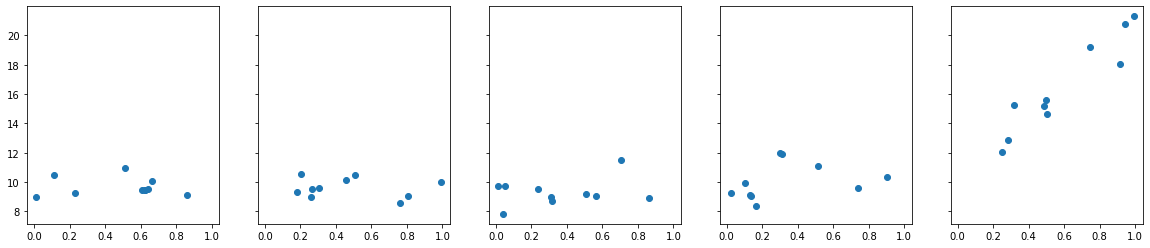

In [45]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(20,4), sharex=True, sharey=True)
for i, ax in enumerate(axes):
    x = lst_inputs[i]["X"]
    y = lst_inputs[i]["Y"]
    ax.scatter(x, y)